In [12]:
import pandas as pd

# Membaca dataset
file_path = '/content/Metro_Interstate_Traffic_Volume.csv'
data = pd.read_csv(file_path)  # Membaca file CSV ke dalam DataFrame Pandas

# Menampilkan informasi dataset
data.info()  # Memberikan gambaran tentang tipe data dan jumlah nilai kosong di setiap kolom
data.head()  # Menampilkan 5 baris pertama untuk melihat struktur dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

* Membaca file CSV ke dalam DataFrame Pandas
* Memberikan gambaran tentang tipe data dan jumlah nilai kosong di setiap kolom
* Menampilkan 5 baris pertama untuk melihat struktur dataset

In [13]:
# Statistik deskriptif kolom numerik
data.describe()  # Menghitung statistik deskriptif seperti rata-rata, min, max, dll., untuk kolom numerik


temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.008168     39.015750     1986.860670
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1193.000000
50%      282.450000      0.000000      0.000000     64.000000     3380.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000   9831.300000      0.510000    100.000000     7280.000000

* Menghitung statistik deskriptif seperti rata-rata, min, max, dll., untuk kolom numerik

In [14]:
# Konversi kolom `date_time` menjadi tipe datetime
data['date_time'] = pd.to_datetime(data['date_time'])  # Agar kolom waktu dapat diolah sebagai datetime

# Mengecek apakah tipe data sudah sesuai
data.info()  # Pastikan kolom `date_time` sekarang bertipe datetime


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


Kolom date_time, yang awalnya berupa string, diubah menjadi tipe datetime menggunakan fungsi pd.to_datetime(). Hal ini penting agar data waktu dapat diolah dengan lebih efisien, misalnya untuk analisis berbasis waktu. Setelah perubahan, tipe data diperiksa kembali menggunakan info() untuk memastikan bahwa kolom tersebut sudah berubah sesuai kebutuhan.

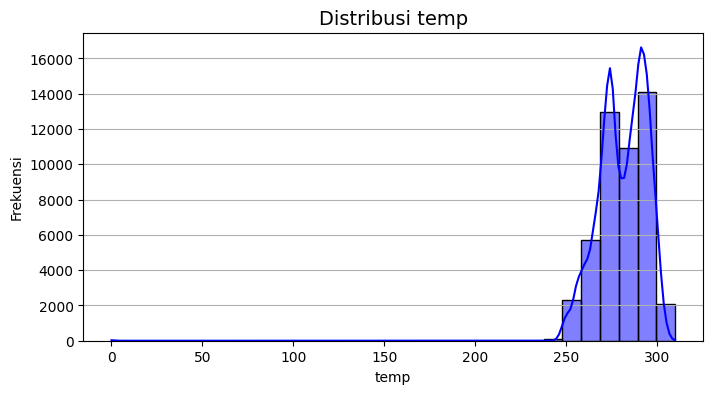

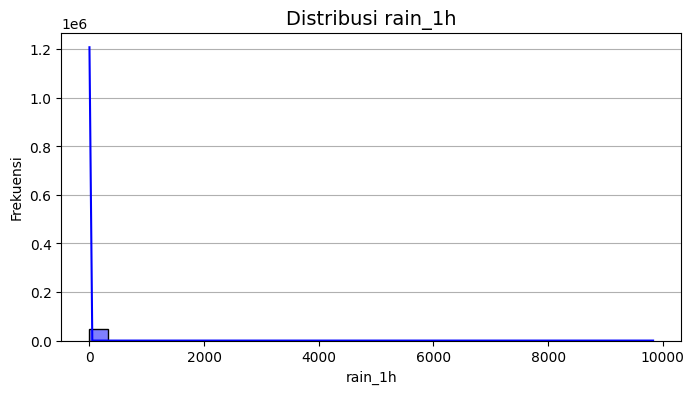

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik untuk divisualisasikan
numeric_columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']

# Membuat plot distribusi
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30, color="blue")  # Plot distribusi data
    plt.title(f"Distribusi {column}", fontsize=14)  # Menambahkan judul grafik
    plt.xlabel(column)  # Label sumbu X
    plt.ylabel("Frekuensi")  # Label sumbu Y
    plt.grid(axis='y')  # Menambahkan grid untuk membantu pembacaan
    plt.show()  # Menampilkan plot


# Membuat plot distribusi
* Menambahkan judul grafik
* Menambahkan grid untuk membantu pembacaan


In [16]:
# Menghitung matriks korelasi
correlation_matrix = data[numeric_columns].corr()  # Korelasi antar kolom numerik

# Visualisasi Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Heatmap dengan nilai korelasi
plt.title("Matriks Korelasi Kolom Numerik", fontsize=14)  # Menambahkan judul
plt.show()  # Menampilkan heatmap


Langkah ini dilakukan untuk memahami hubungan antar variabel numerik dengan membuat matriks korelasi. Korelasi dihitung menggunakan fungsi corr() dan divisualisasikan dalam bentuk heatmap. Heatmap ini membantu mengidentifikasi apakah ada hubungan linear yang signifikan antara variabel, seperti hubungan positif lemah antara suhu dan volume lalu lintas.

